In [134]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white', frameon=True, fontsize=20, figsize=(12, 12))

necrosis_gene_list = ["PGK1", "NDRG1", "HK2", "TNFAIP3", "ANGPTL4", "LIF", "IDS"]
perinectoric_gene_list = ["CD44"]
infiltrating_gene_list = ["SLC20A2", "GABBR2", "HS6ST1", "RARRES1", "ATP1B1", "SCN2A"]
perivascular_zone = ["NALF1", "PDE4D", "MAST4"]
ct_gene_list = ["IGFBP2", "MYC", "TIMP1", "EZH2"]
leading_edge = ["BIRC5", "CCNB2", "CCNB1"]


scanpy==1.9.2 anndata==0.8.0 umap==0.5.3 numpy==1.22.0 scipy==1.10.0 pandas==1.3.5 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.8


In [135]:
adata = sc.read('write/human_no_1914_final.h5ad')
sc.pp.log1p(adata)
# redo neighbors and umap
sc.pp.neighbors(adata, n_pcs=13, n_neighbors=10)

computing neighbors
    using 'X_pca' with n_pcs = 13
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [136]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=13)

computing PCA
    with n_comps=13
    finished (0:00:15)


In [137]:
sc.pp.neighbors(adata, n_pcs=11, n_neighbors=10)
sc.tl.umap(adata, min_dist=0.18, spread=0.15)



computing neighbors
    using 'X_pca' with n_pcs = 11
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


In [138]:
necrosis_data = adata[:, necrosis_gene_list].X
necrosis_expression = np.sum(necrosis_data, axis=1)
necrosis_expression = pd.DataFrame(necrosis_expression)

perinectoric_data = adata[:, perinectoric_gene_list].X
perinectoric_expression = np.sum(perinectoric_data, axis=1)
perinectoric_expression = pd.DataFrame(perinectoric_expression)

infiltrating_data = adata[:, infiltrating_gene_list].X
infiltrating_expression = np.sum(infiltrating_data, axis=1)
infiltrating_expression = pd.DataFrame(infiltrating_expression)

perivascular_data = adata[:, perivascular_zone].X
perivascular_expression = np.sum(perivascular_data, axis=1)
perivascular_expression = pd.DataFrame(perivascular_expression)

ct_data = adata[:, ct_gene_list].X
ct_expression = np.sum(ct_data, axis=1)
ct_expression = pd.DataFrame(ct_expression)

leading_edge_data = adata[:, leading_edge].X
leading_edge_expression = np.sum(leading_edge_data, axis=1)
leading_edge_expression = pd.DataFrame(leading_edge_expression)





In [139]:
# add to adata
adata.obs["necrosis"] = pd.Series(necrosis_expression[0].values, index=adata.obs.index)
adata.obs["perinectoric"] = pd.Series(perinectoric_expression[0].values, index=adata.obs.index)
adata.obs["infiltrating"] = pd.Series(infiltrating_expression[0].values, index=adata.obs.index)
adata.obs["perivascular"] = pd.Series(perivascular_expression[0].values, index=adata.obs.index)
adata.obs["ct"] = pd.Series(ct_expression[0].values, index=adata.obs.index)
adata.obs["leading_edge"] = pd.Series(leading_edge_expression[0].values, index=adata.obs.index)

adata.obs

batch leiden louvain  necrosis  \
AAACCCAAGATGCTTC-1-1914d_human  1914d_human     11      11  1.348056   
AAACCCAAGTCCTGCG-1-1914d_human  1914d_human      0       7  2.499835   
AAACCCACACCCTGTT-1-1914d_human  1914d_human      6       1  1.449614   
AAACCCACACTTTATC-1-1914d_human  1914d_human      2       3  3.208551   
AAACCCACATAAGCAA-1-1914d_human  1914d_human     10      10  0.000000   
...                                     ...    ...     ...       ...   
TTTGTTGCATCCTTGC-1-1919d_human  1919d_human      9       9  0.000000   
TTTGTTGGTGTAGTGG-1-1919d_human  1919d_human      1       0  1.523232   
TTTGTTGTCCATACTT-1-1919d_human  1919d_human     13       0  0.000000   
TTTGTTGTCCCAAGCG-1-1919d_human  1919d_human     17      16  0.000000   
TTTGTTGTCGCCATAA-1-1919d_human  1919d_human     13       0  0.000000   

                                perinectoric  infiltrating  perivascular  \
AAACCCAAGATGCTTC-1-1914d_human      0.000000      0.000000           0.0   
AAACCCAAGTCCTGCG-1-1914d_human      1.249918      1.249918           0.0   
AAACCCACACCCTGTT-1-1914d_human      0.000000      0.000000           0.0   
AAACCCACACTTTATC-1-1914d_human      0.000000      0.000000           0.0   
AAACCCACATAAGCAA-1-1914d_human      1.129167      0.922753           0.0   
...                                      ...           ...           ...   
TTTGTTGCATCCTTGC-1-1919d_human      0.000000      1.980883           0.0   
TTTGTTGGTGTAGTGG-1-1919d_human      0.761616      0.000000           0.0   
TTTGTTGTCCATACTT-1-1919d_human      0.000000      1.093346           0.0   
TTTGTTGTCCCAAGCG-1-1919d_human      1.098829      1.098829           0.0   
TTTGTTGTCGCCATAA-1-1919d_human      1.054160      1.054160           0.0   

                                      ct  leading_edge  
AAACCCAAGATGCTTC-1-1914d_human  1.507124      0.000000  
AAACCCAAGTCCTGCG-1-1914d_human  1.249918      0.000000  
AAACCCACACCCTGTT-1-1914d_human  2.356351      0.000000  
AAACCCACACTTTATC-1-1914d_human  1.101511      0.892595  
AAACCCACATAAGCAA-1-1914d_human  2.051920      0.000000  
...                                  ...           ...  
TTTGTTGCATCCTTGC-1-1919d_human  1.190589      0.000000  
TTTGTTGGTGTAGTGG-1-1919d_human  3.600873      0.761616  
TTTGTTGTCCATACTT-1-1919d_human  2.592334      0.000000  
TTTGTTGTCCCAAGCG-1-1919d_human  1.098829      0.000000  
TTTGTTGTCGCCATAA-1-1919d_human  1.247745      1.054160  

[23813 rows x 9 columns]

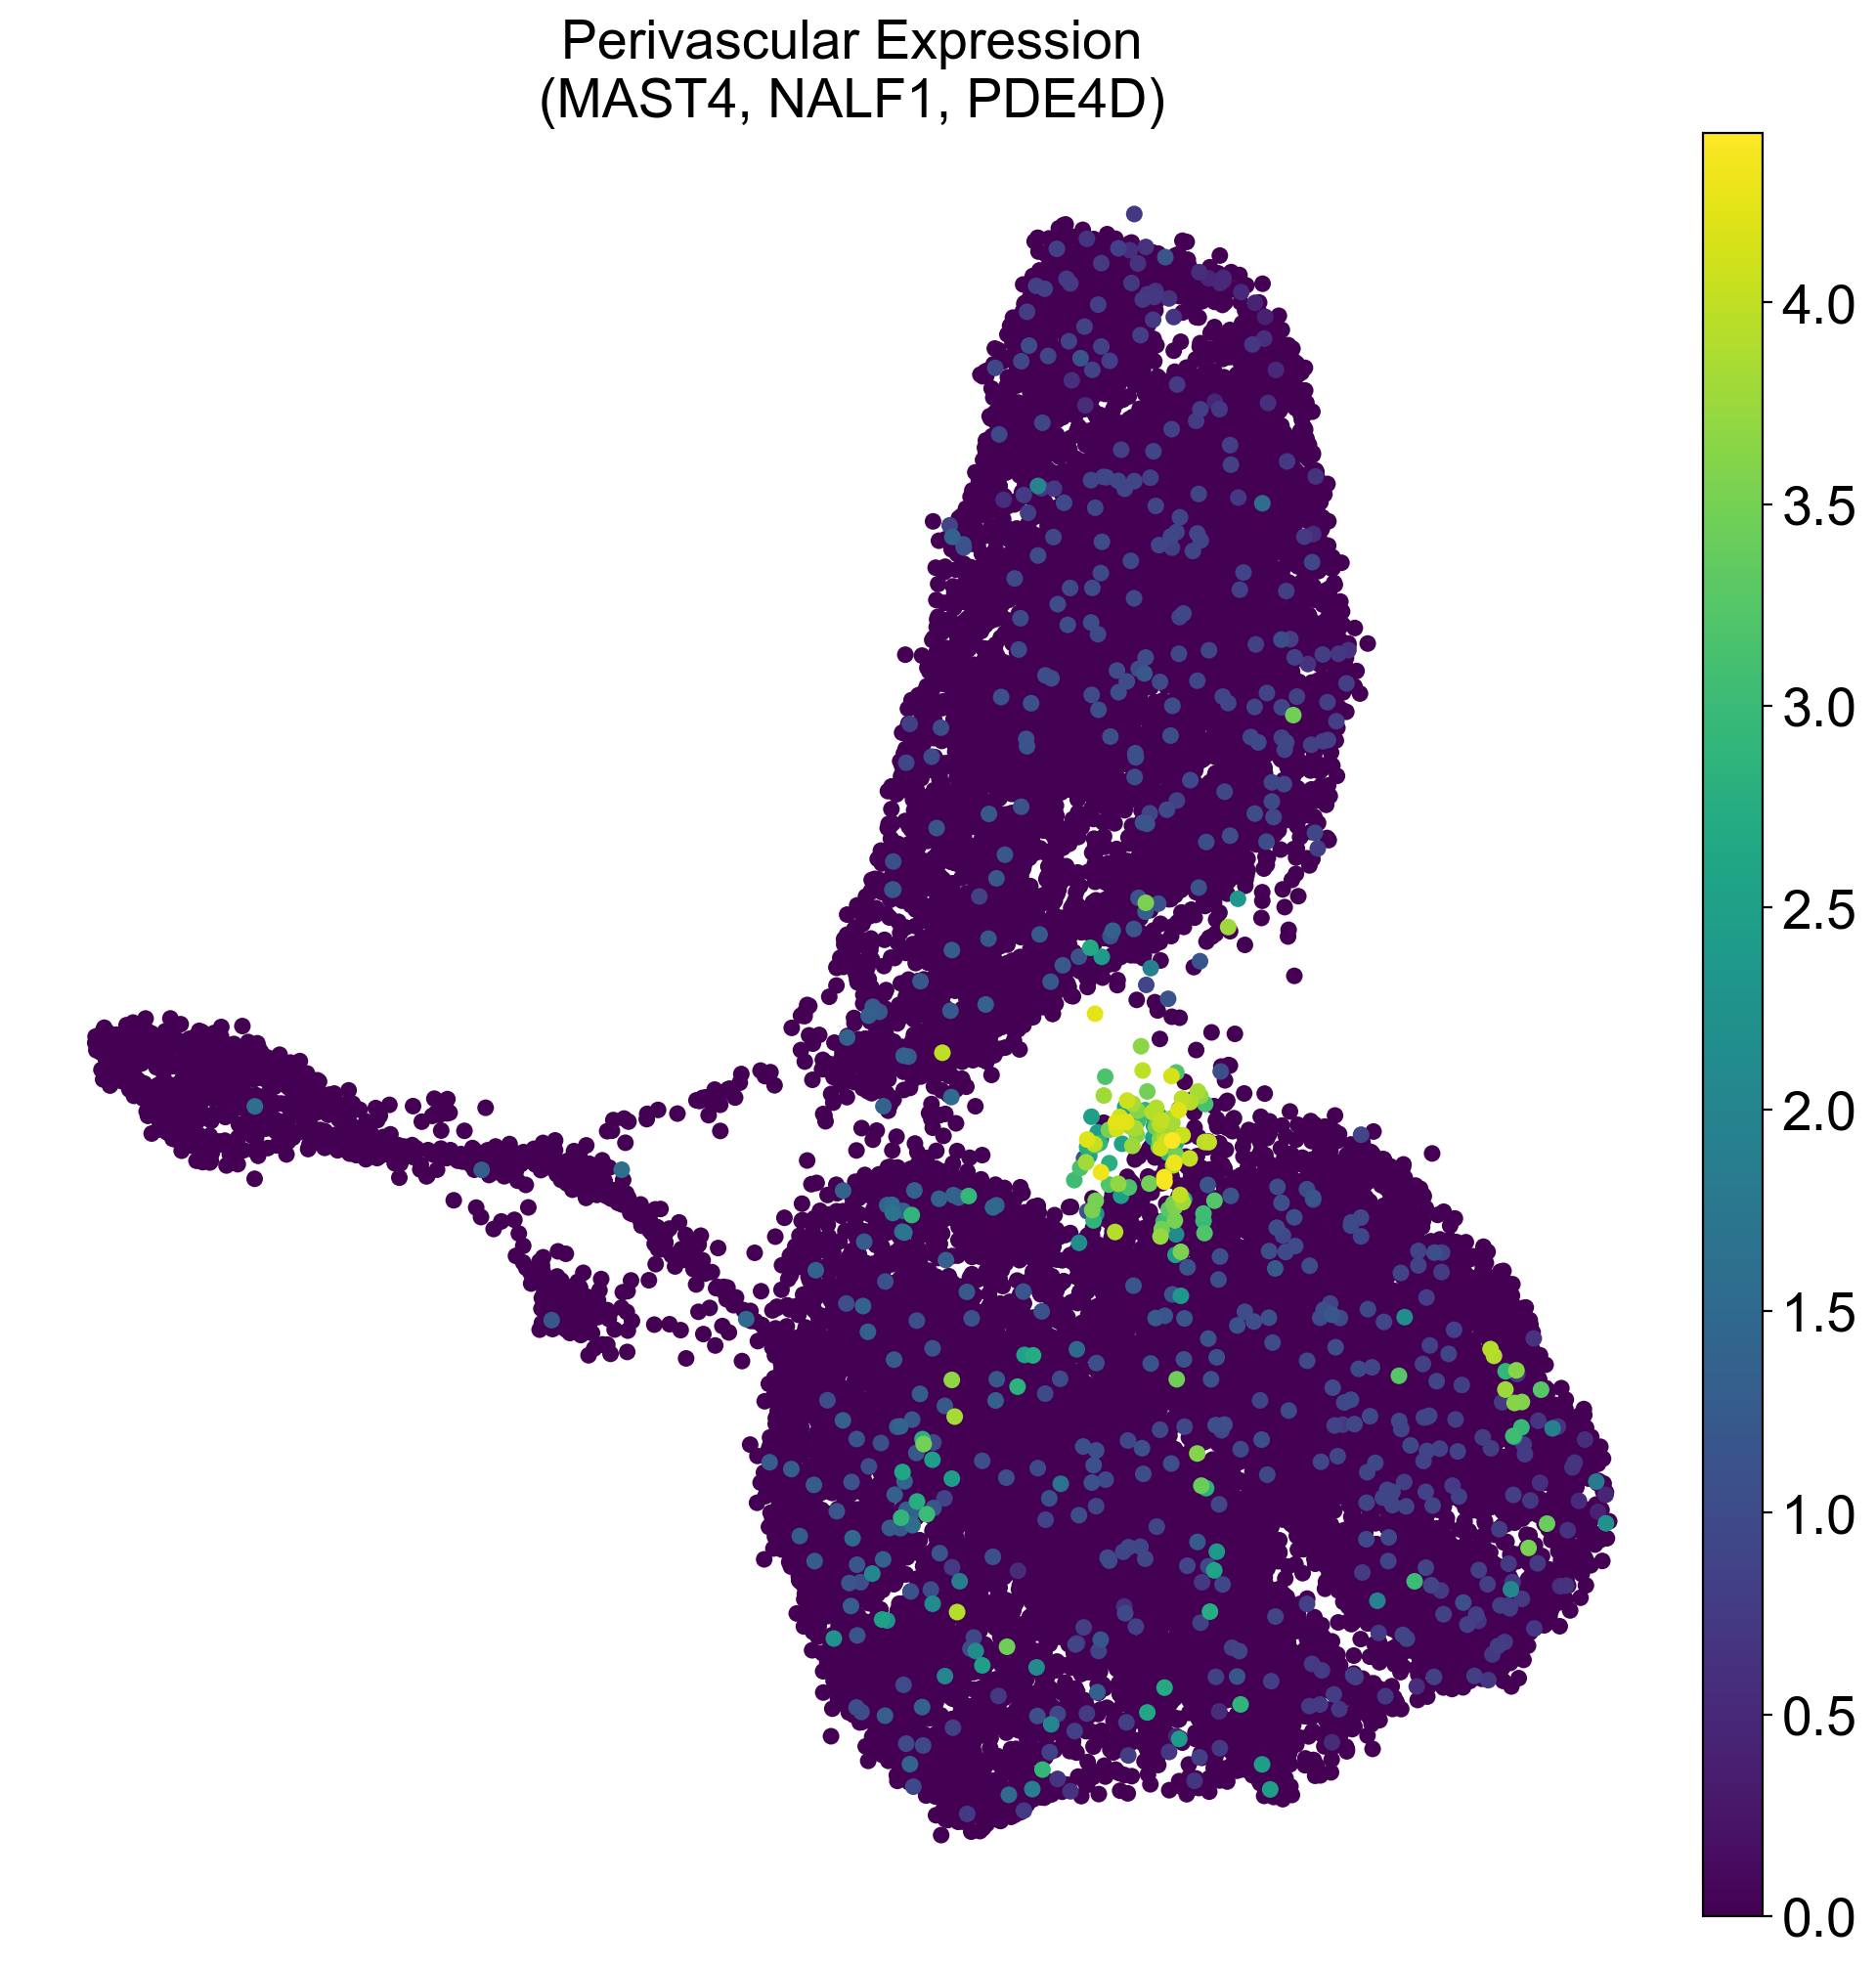

<Figure size 1200x1200 with 0 Axes>

In [146]:
sc.pl.umap(adata, color=['perivascular'], frameon=False, size=150, title="Perivascular Expression\n(MAST4, NALF1, PDE4D)")
plt.savefig('figures/perivascular_expression.png', dpi=300, bbox_inches='tight')

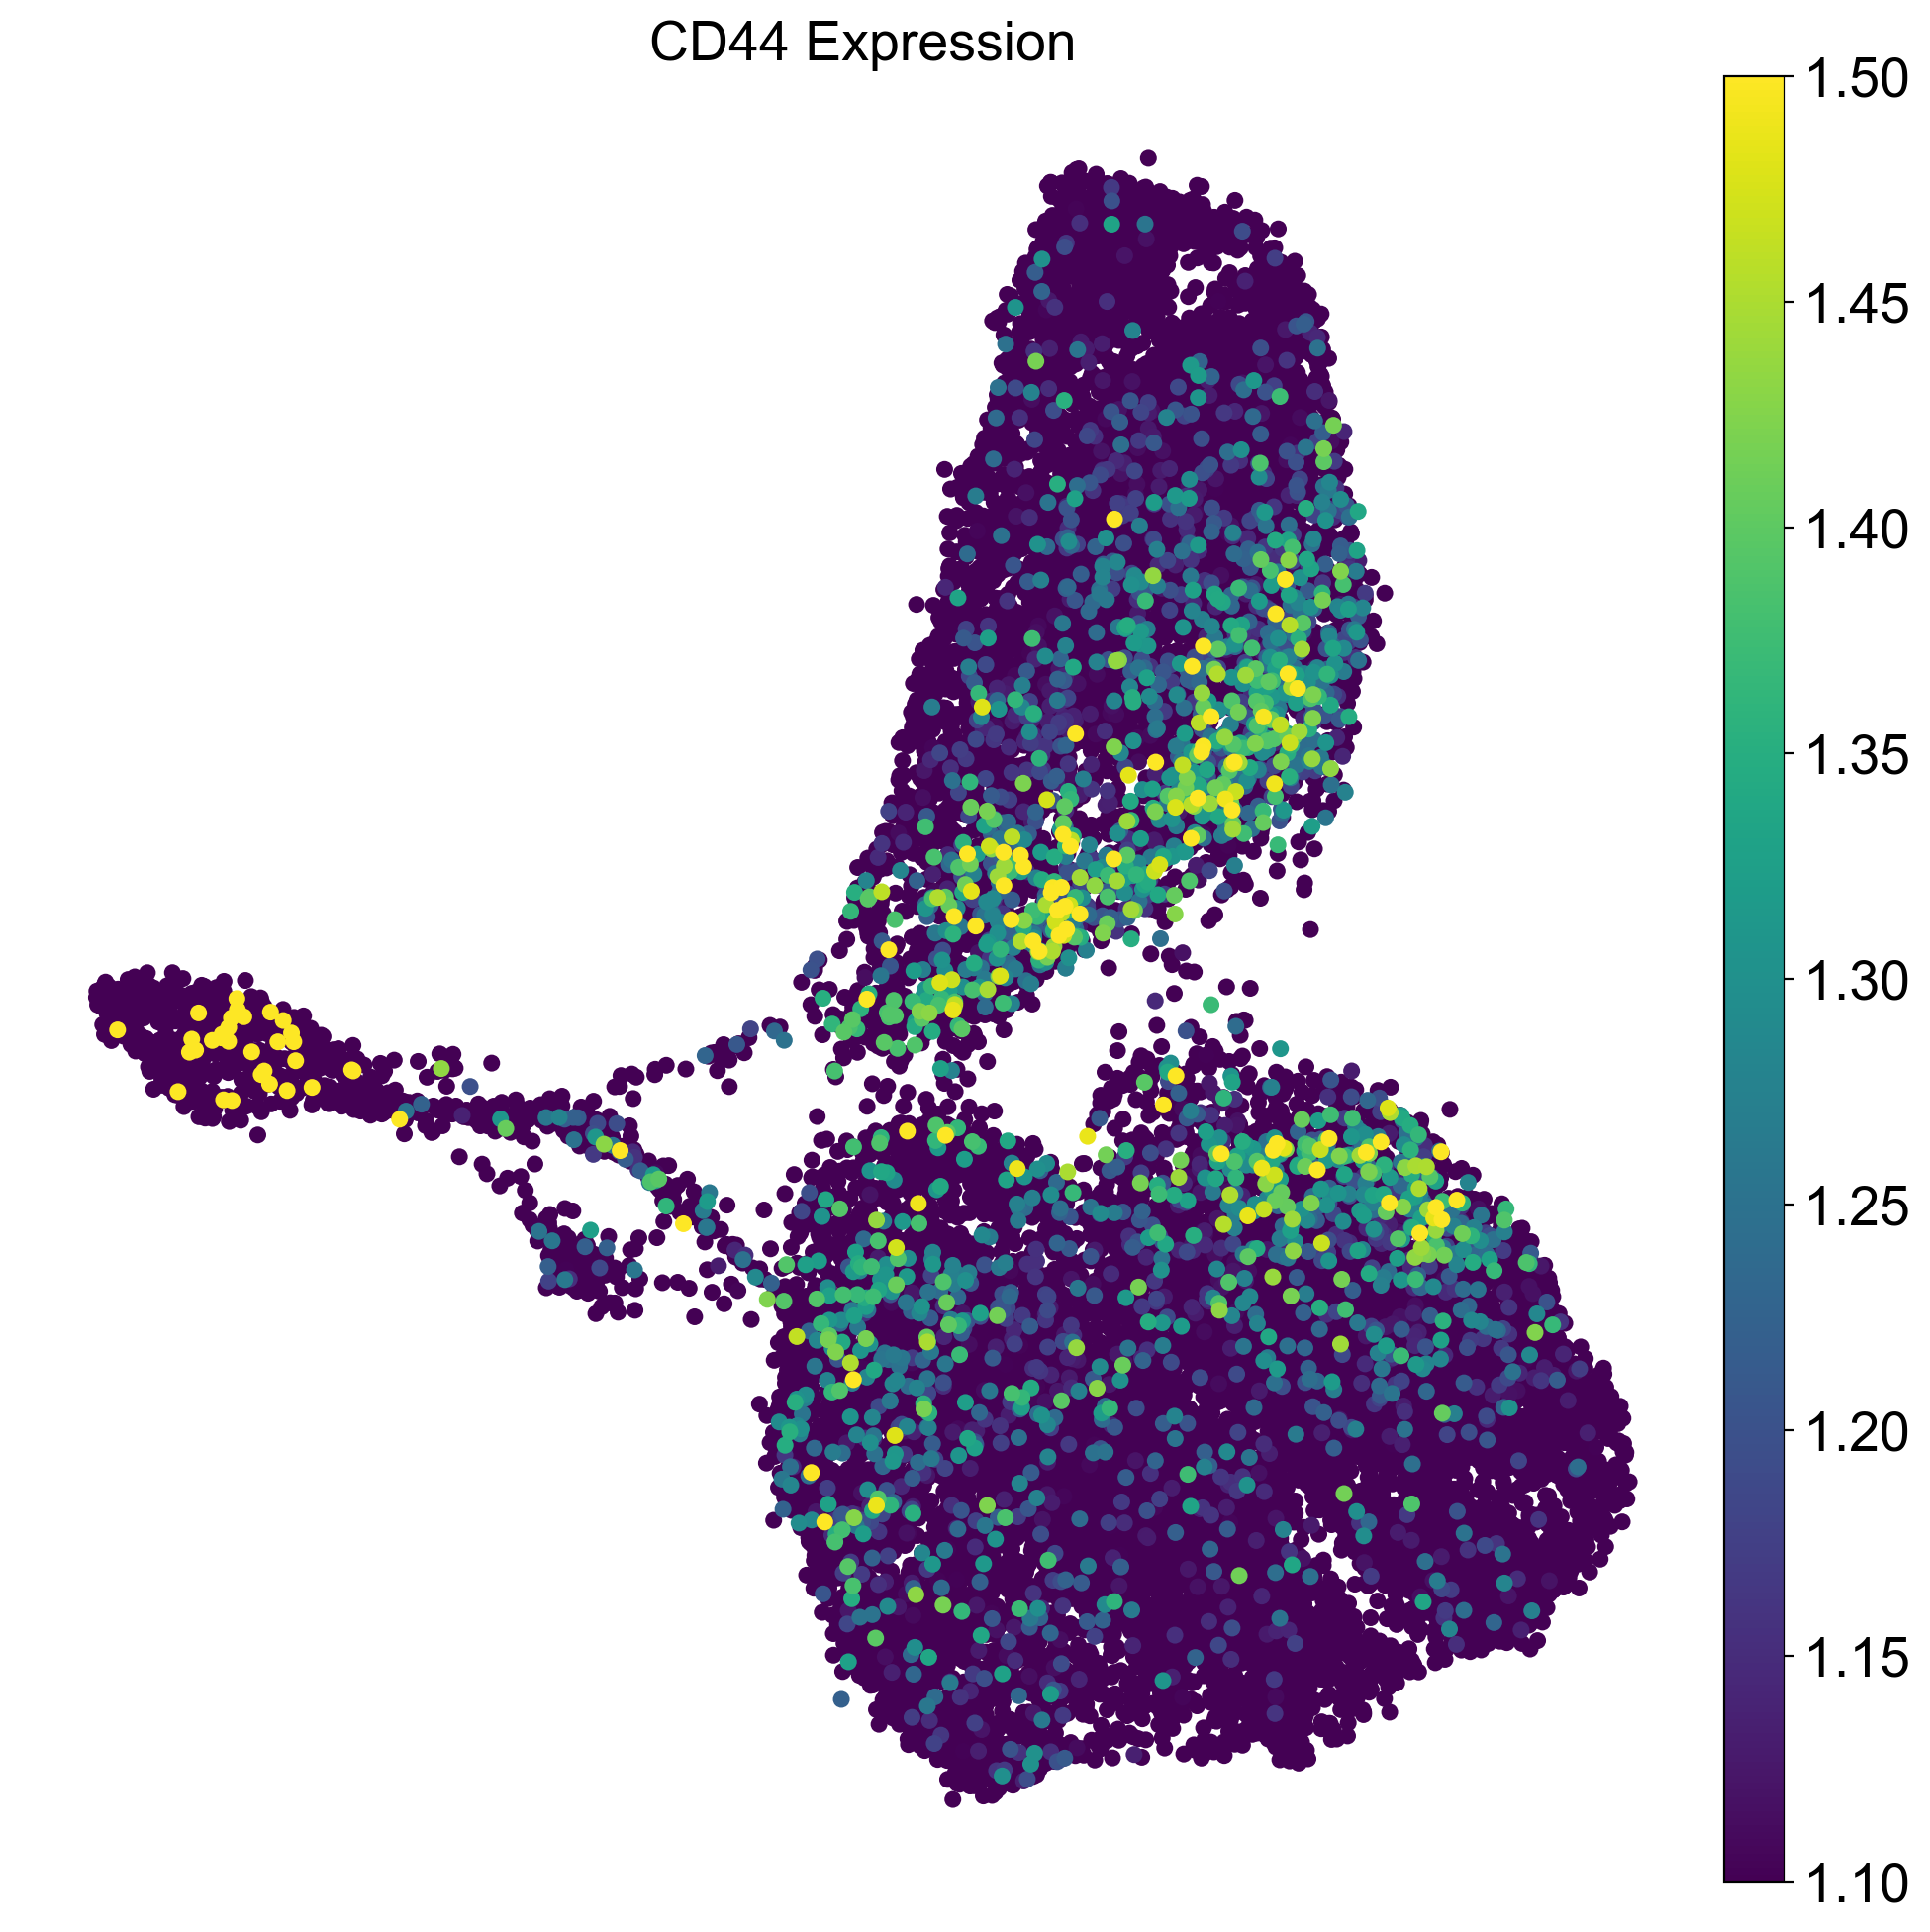

<Figure size 1200x1200 with 0 Axes>

In [154]:
sc.pl.umap(adata, color=["CD44"], frameon=False, size=150, vmax=1.5, vmin=1.1, title="CD44 Expression")
# save figure to file
plt.savefig('figures/CD44_expression.png', dpi=300, bbox_inches='tight')

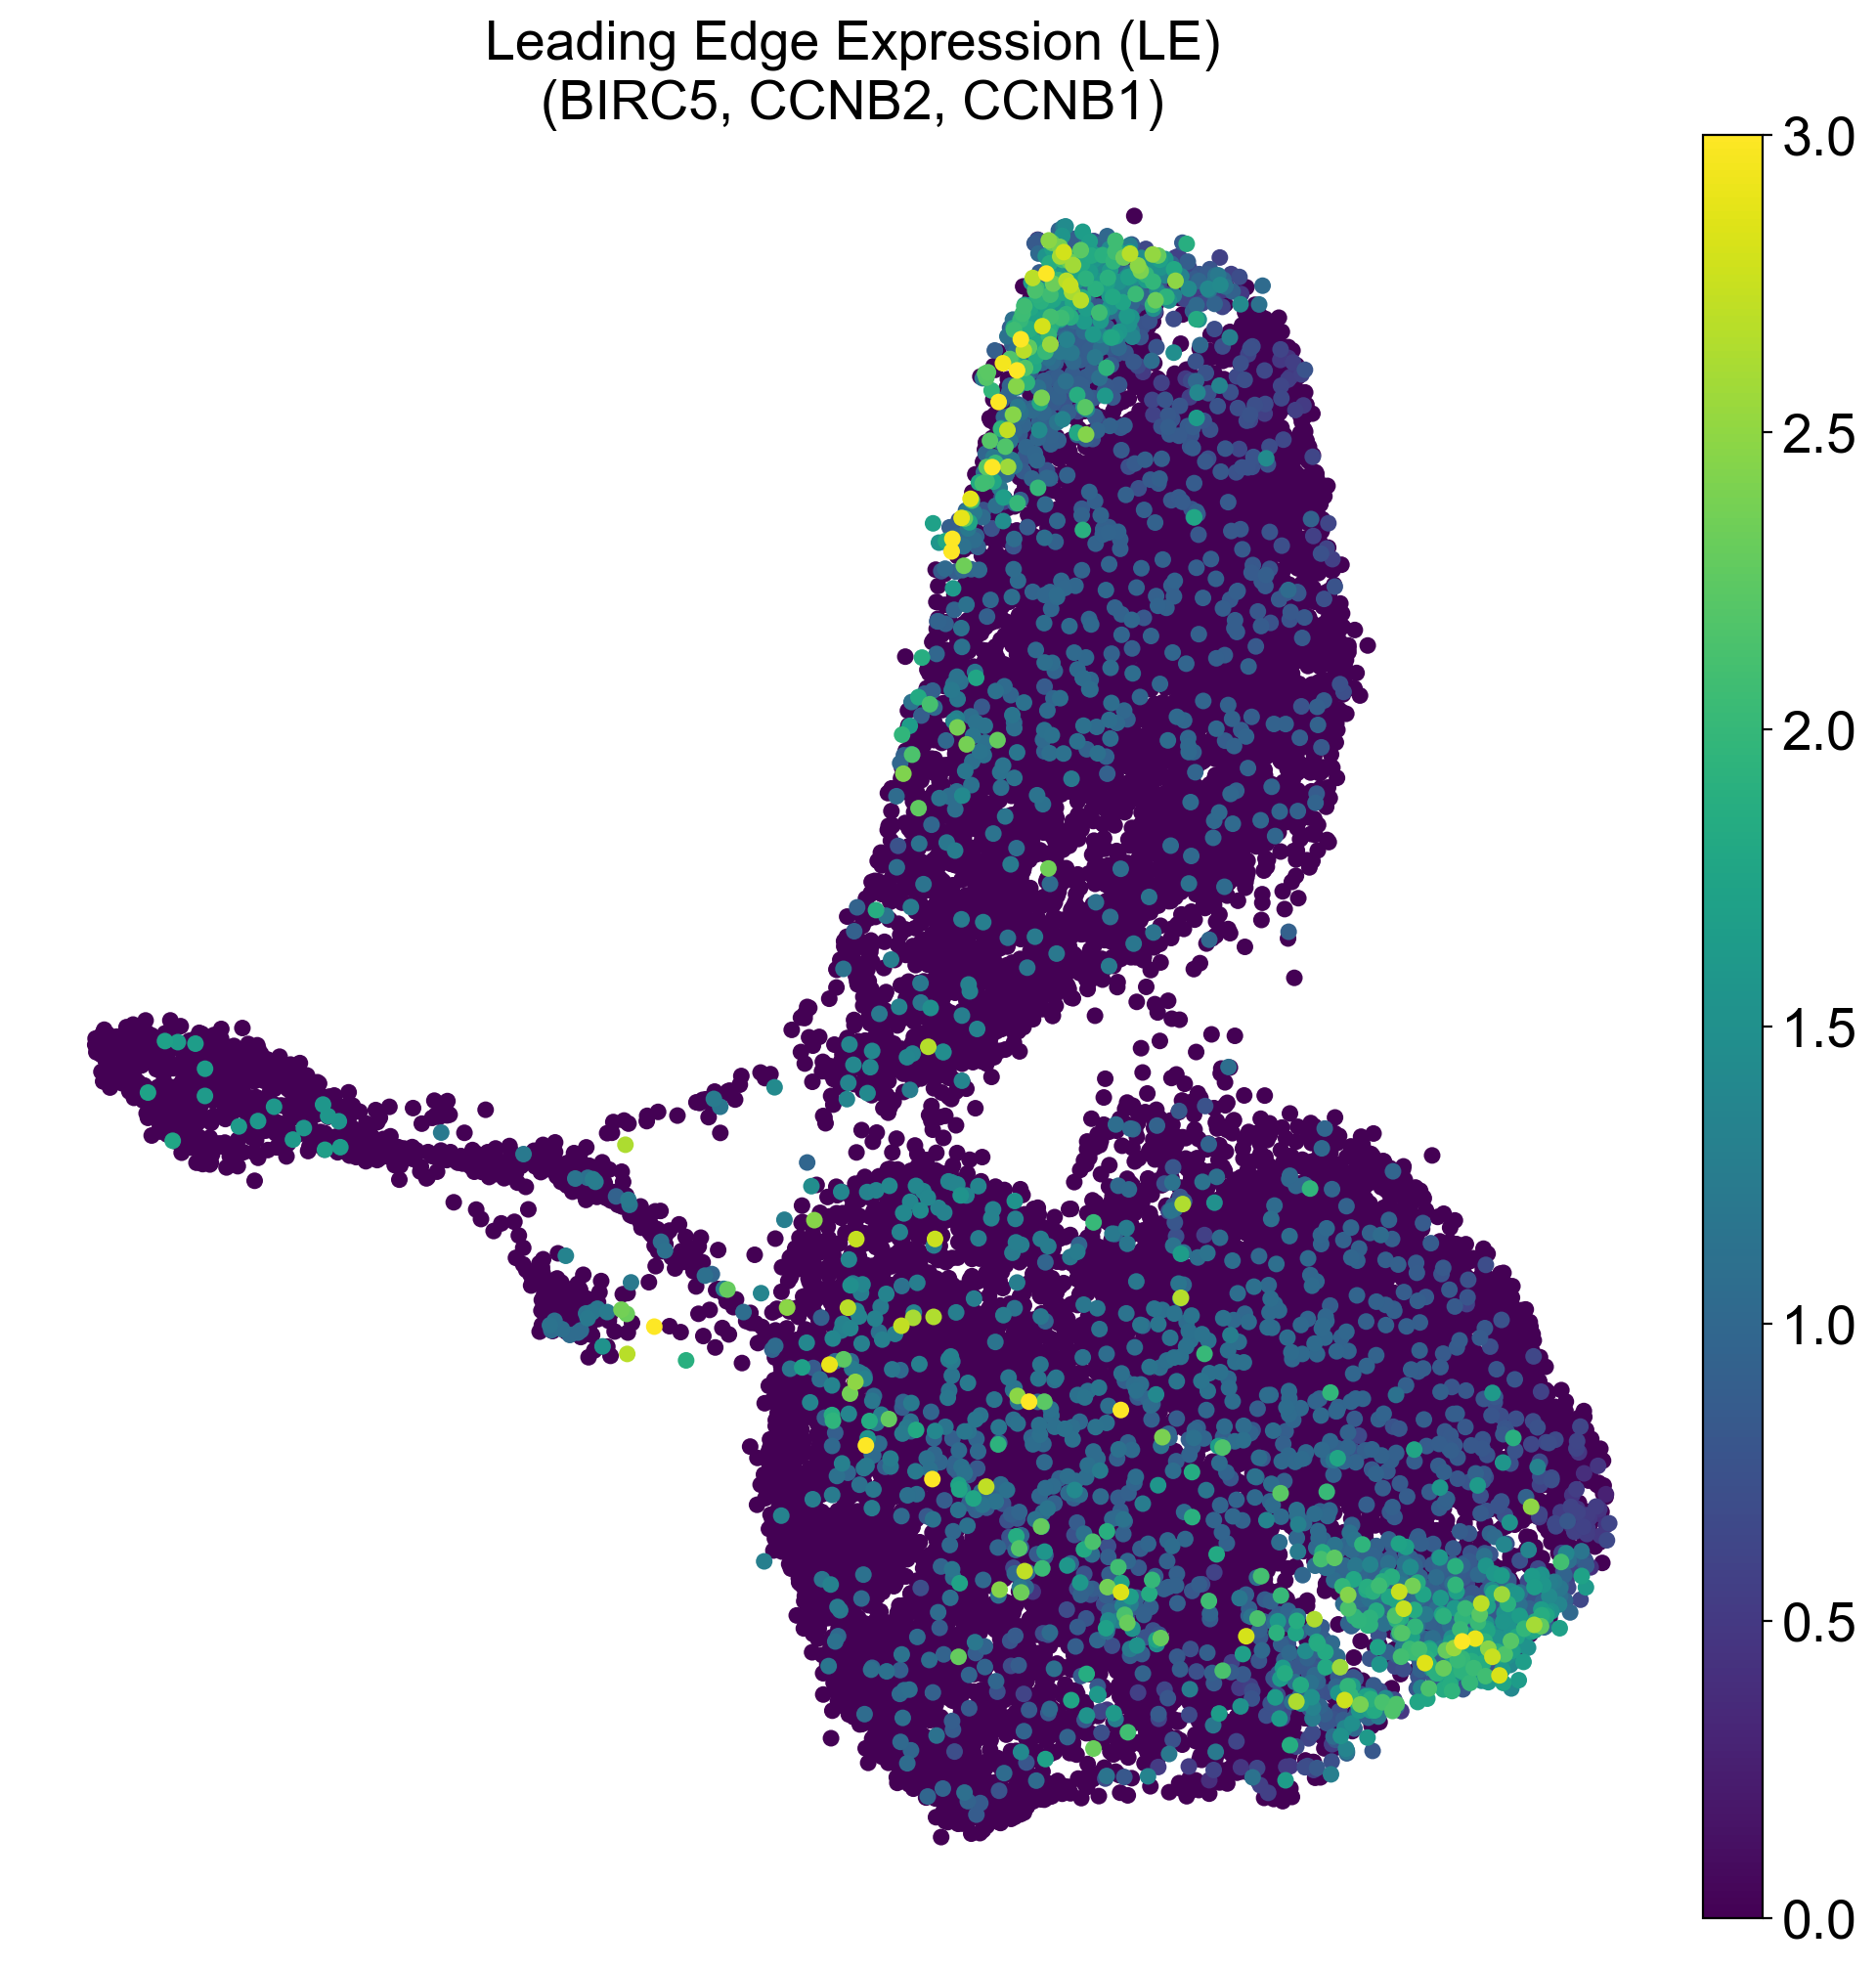

<Figure size 1200x1200 with 0 Axes>

In [148]:

# include subtitle to write BIRC5, CCNB2, CCNB1
sc.pl.umap(adata, color=['leading_edge'], frameon=False, size=150, vmin=0, vmax=3, title="Leading Edge Expression (LE)\n(BIRC5, CCNB2, CCNB1)")
plt.savefig('figures/leading_edge_expression.png', dpi=300, bbox_inches='tight')

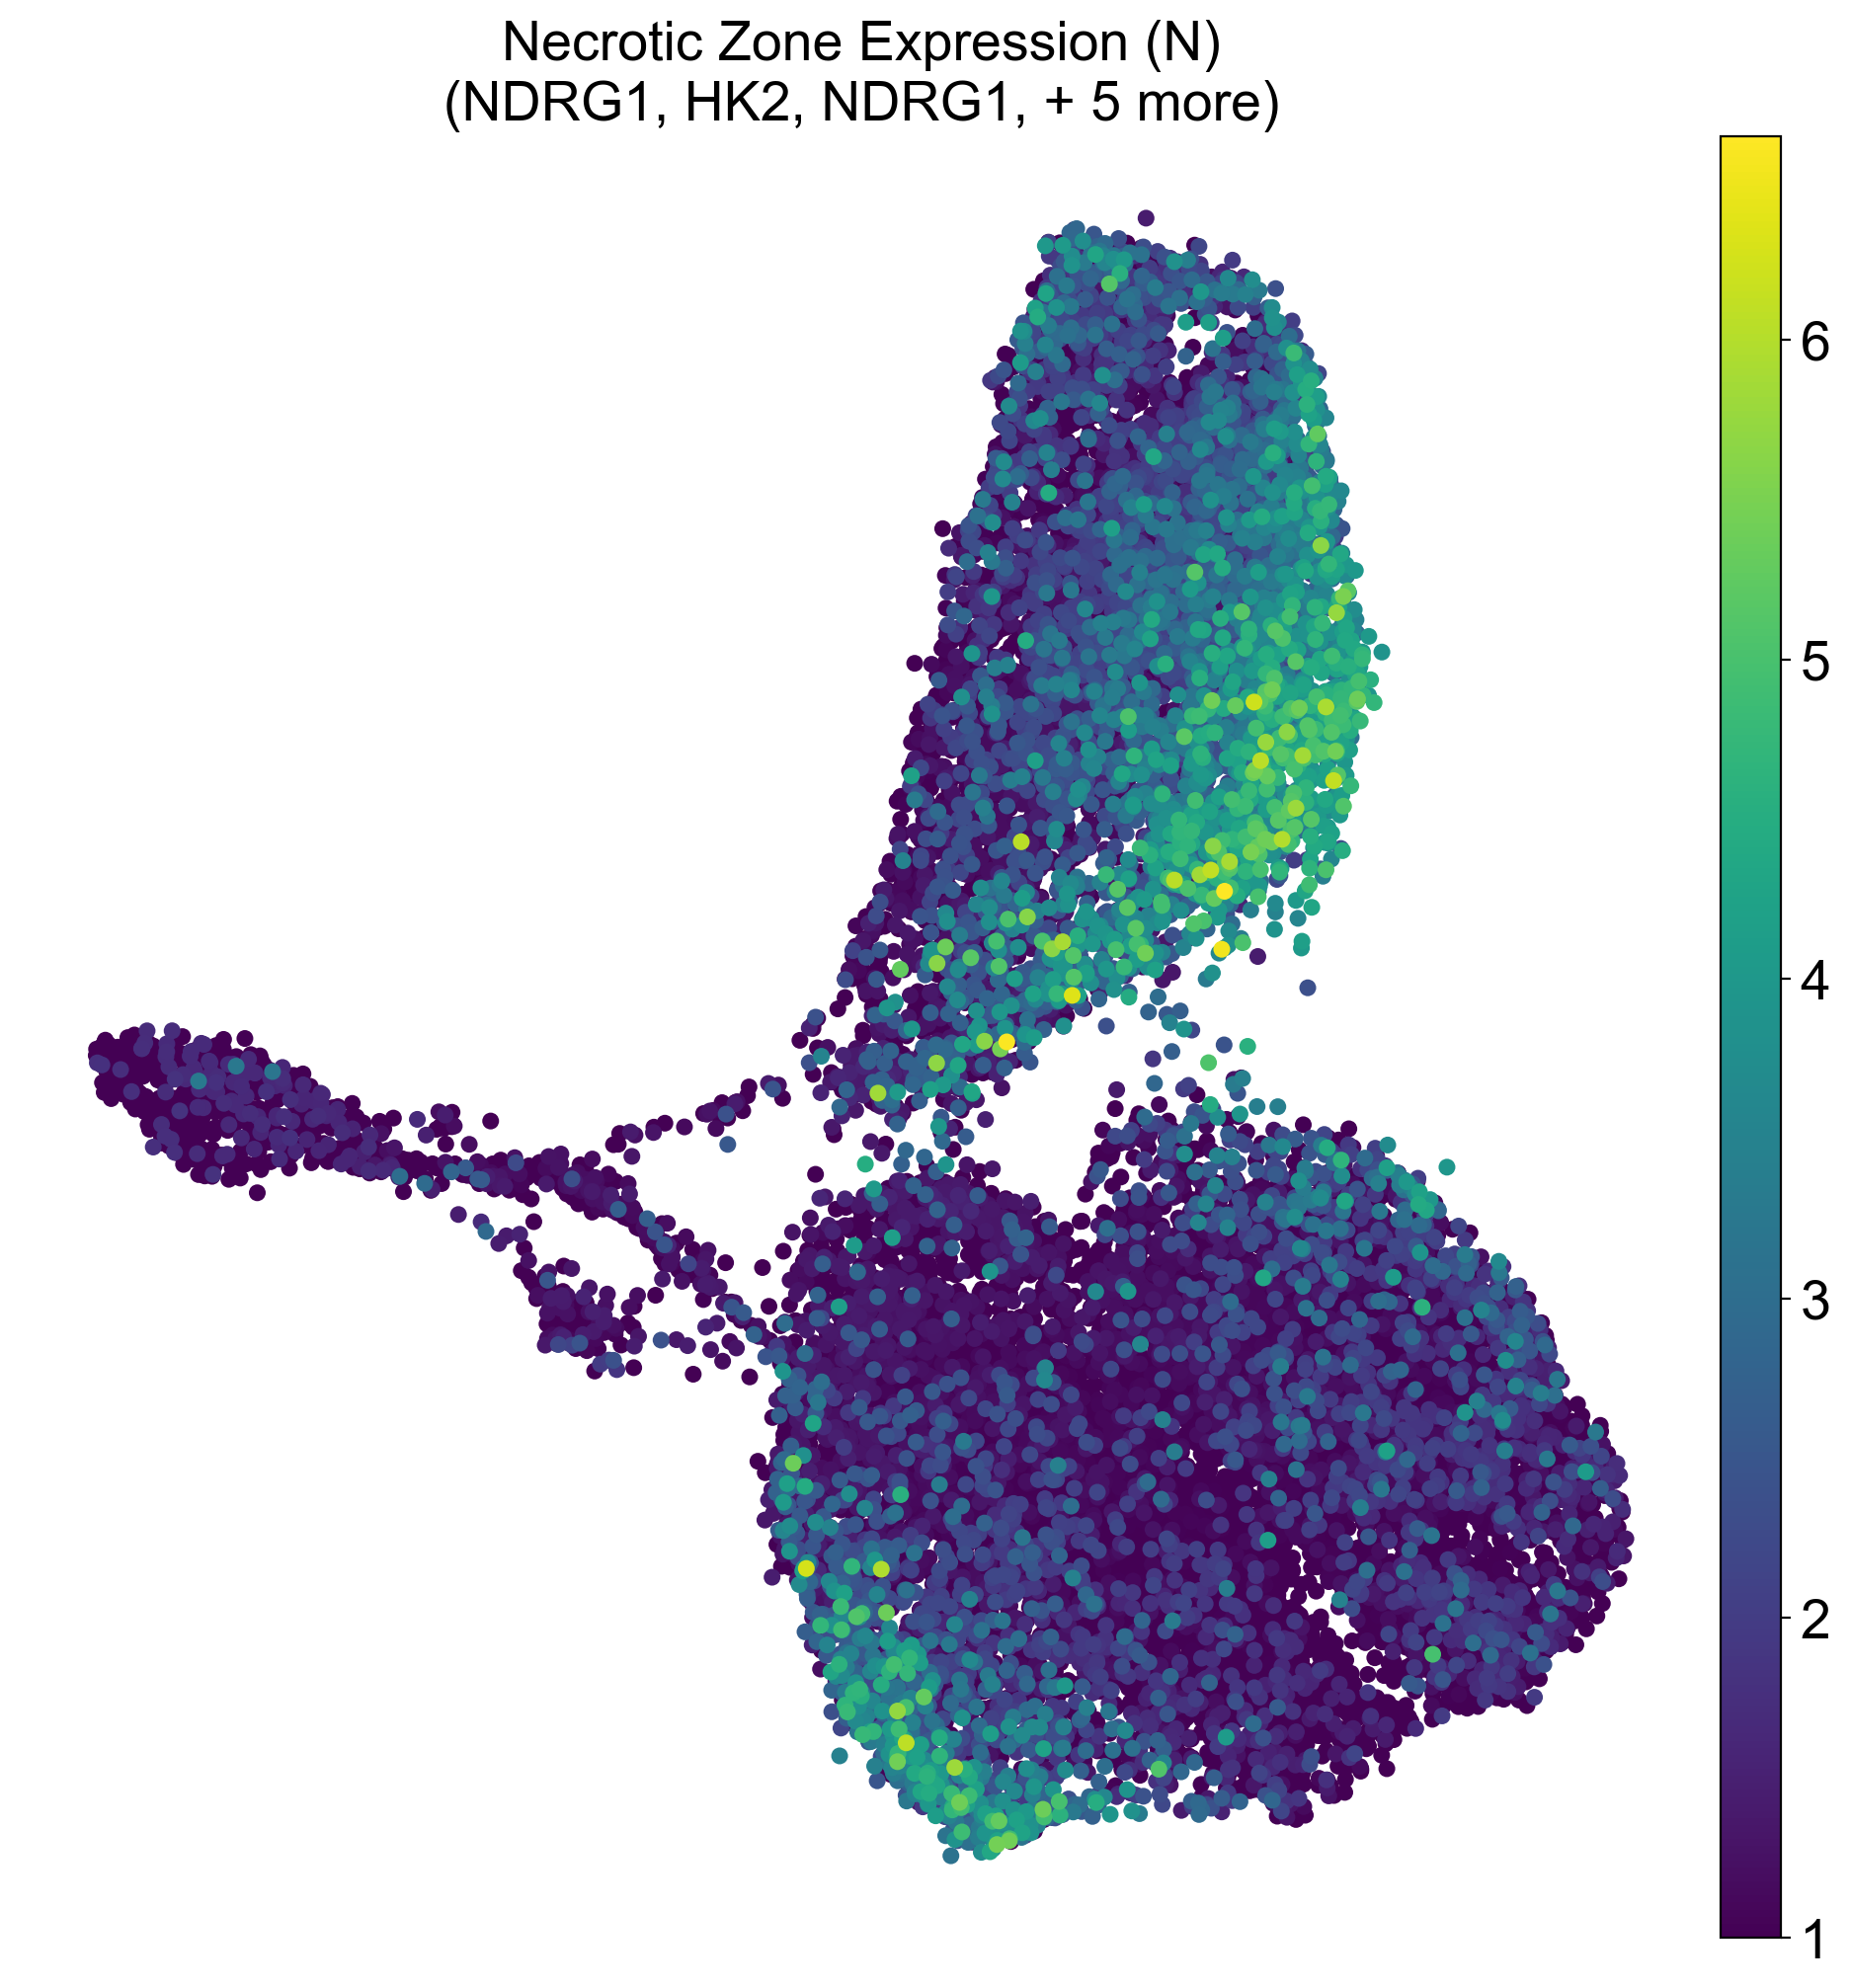

<Figure size 1200x1200 with 0 Axes>

In [149]:
sc.pl.umap(adata, color='necrosis', frameon=False , size=150, vmin=1, title="Necrotic Zone Expression (N)\n(NDRG1, HK2, NDRG1, + 5 more)")
plt.savefig('figures/necrosis_expression.png', dpi=300, bbox_inches='tight')

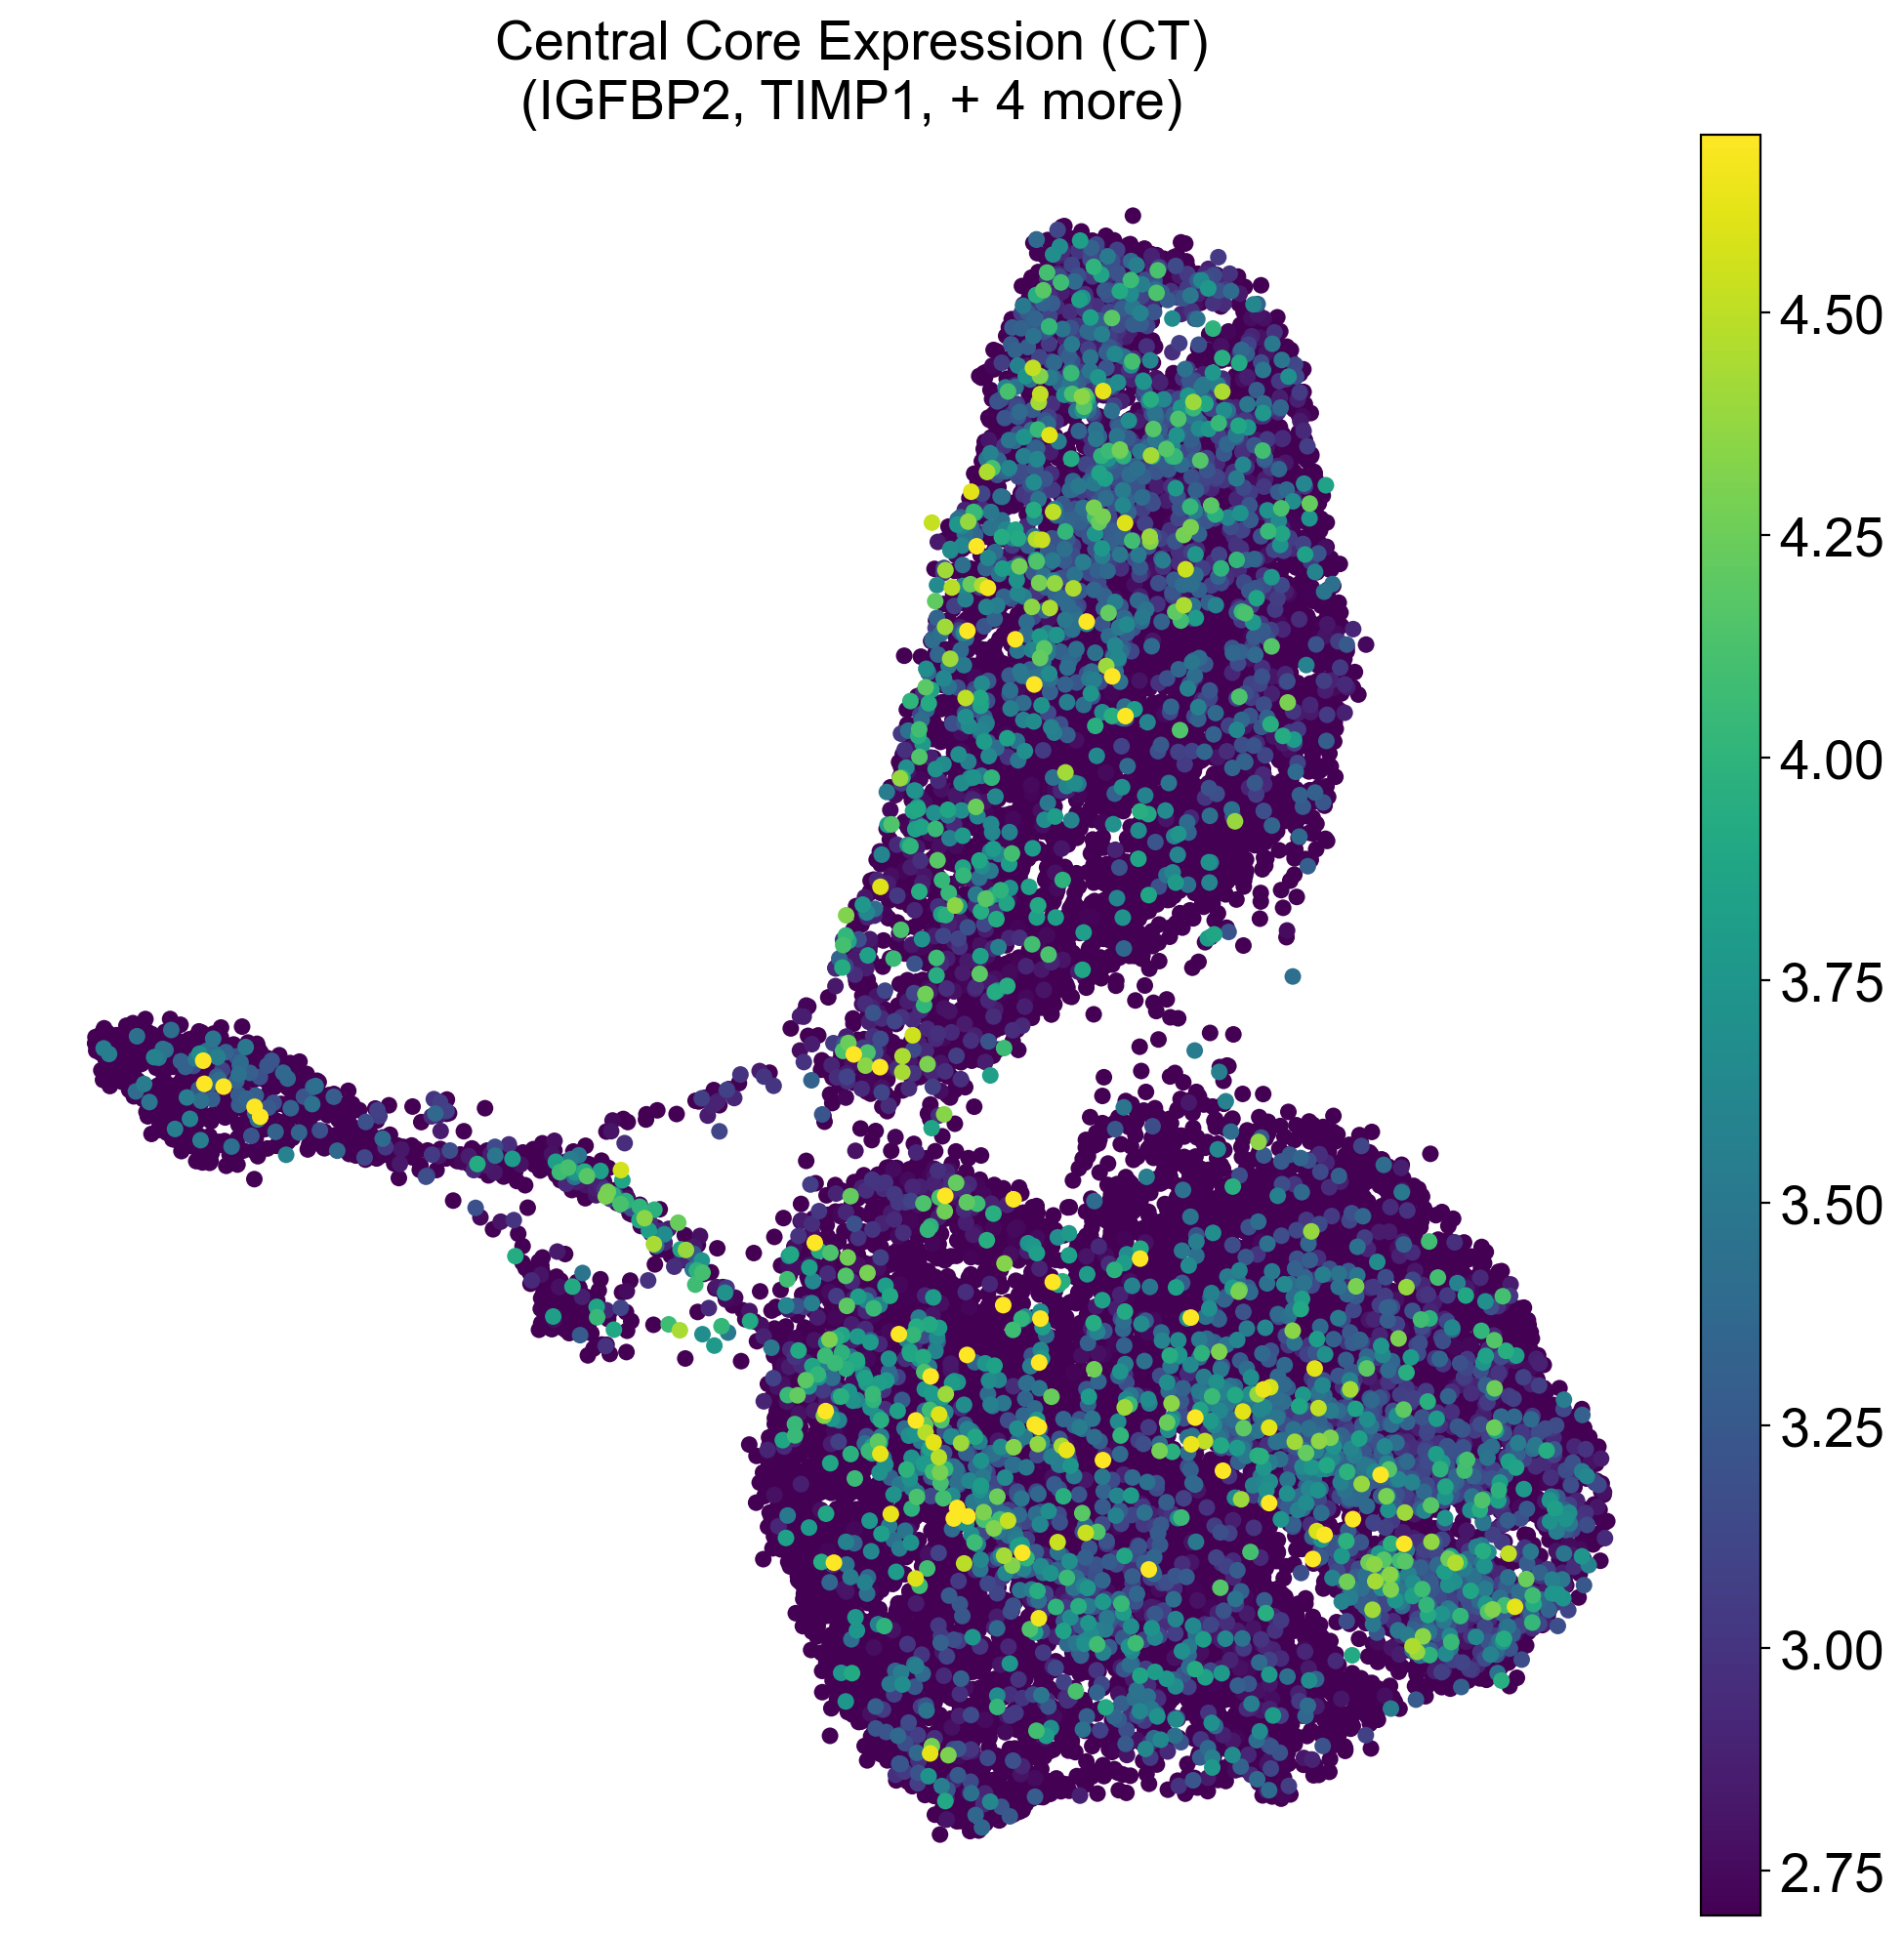

<Figure size 1200x1200 with 0 Axes>

In [162]:
sc.pl.umap(adata, color='ct', frameon=False , vmin=2.7, vmax=4.7, size=150,title="Central Core Expression (CT)\n(IGFBP2, TIMP1, + 4 more)")
plt.savefig('figures/ct_expression.png', dpi=300, bbox_inches='tight')

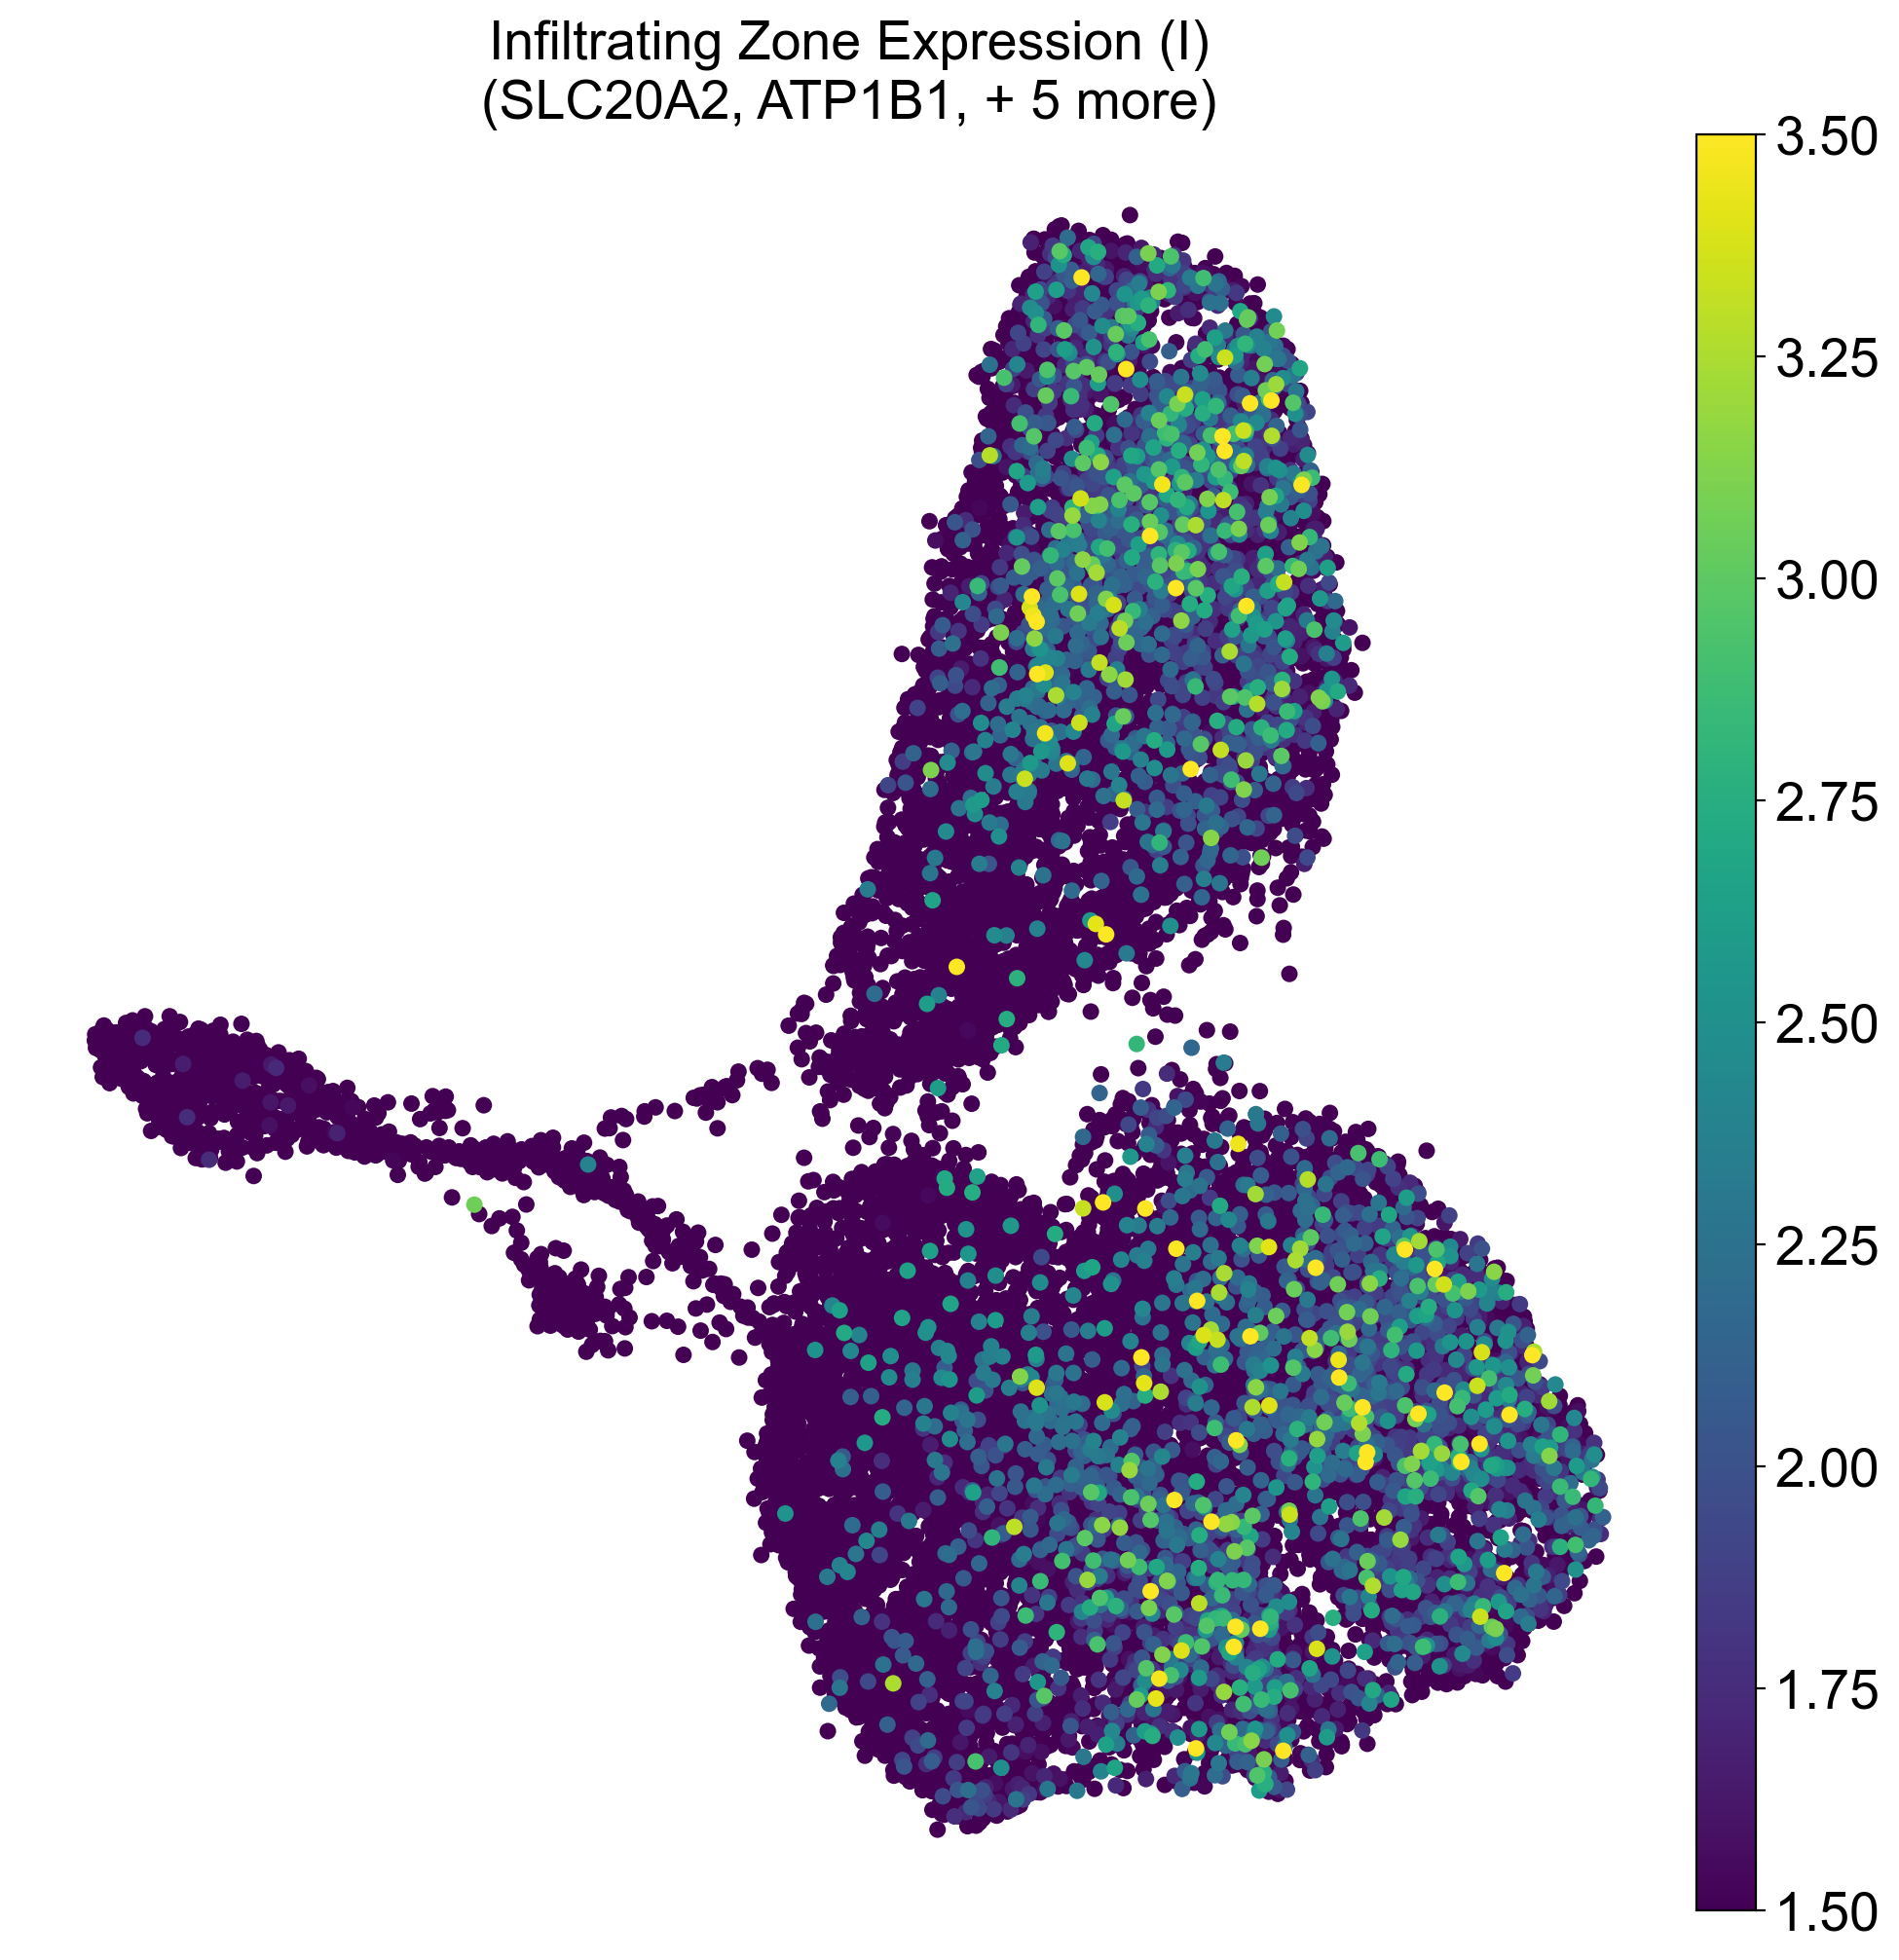

<Figure size 1200x1200 with 0 Axes>

In [153]:
sc.pl.umap(adata, color='infiltrating', frameon=False , size=150, vmax=3.5, vmin=1.5, title="Infiltrating Zone Expression (I)\n(SLC20A2, ATP1B1, + 5 more)")
plt.savefig('figures/infiltrating_expression.png', dpi=300, bbox_inches='tight')